In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 3s 1us/step


In [3]:
maxlen = 100
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [4]:
num_classes = max(y_train) + 1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [6]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=maxlen))
model.add(LSTM(128))
model.add(Dense(num_classes, activation='softmax'))

c:\Users\Chummy\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [7]:
# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train,epochs=10,
                    batch_size=64,validation_split=0.2)

Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 20s 142ms/step - accuracy: 0.3483 - loss: 2.7761 - val_accuracy: 0.4775 - val_loss: 1.9821
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 138ms/step - accuracy: 0.5044 - loss: 1.8684 - val_accuracy: 0.5042 - val_loss: 1.8294
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 17s 152ms/step - accuracy: 0.5203 - loss: 1.7257 - val_accuracy: 0.5787 - val_loss: 1.6561
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - accuracy: 0.5915 - loss: 1.5579 - val_accuracy: 0.5988 - val_loss: 1.5775
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 13s 118ms/step - accuracy: 0.6393 - loss: 1.3392 - val_accuracy: 0.5665 - val_loss: 1.5574
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 18s 160ms/step - accuracy: 0.6834 - loss: 1.1853 - val_accuracy: 0.6461 - val_loss: 1.4071
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 18s 160ms/step - accuracy: 0.7244 - loss: 0.9951 - val_accuracy: 0.6489 - val_loss: 1.3997
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 17s 149ms/step - accuracy: 0.7601 - loss: 0

In [9]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6733 - loss: 1.5308
Test Accuracy: 66.56%


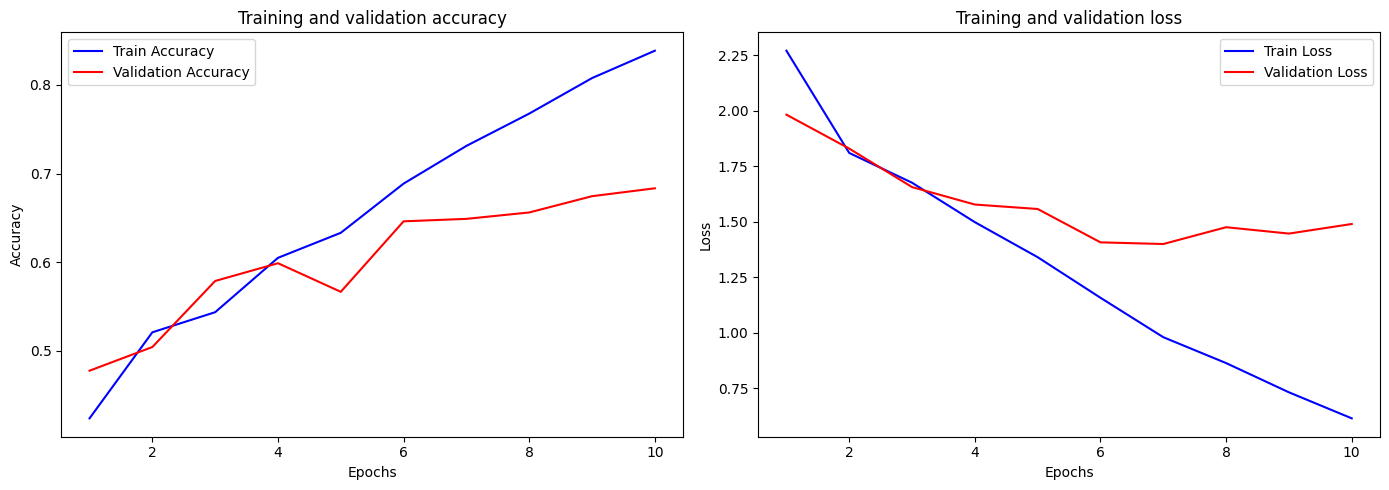

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

axes[0].plot(epochs, acc, 'b', label='Train Accuracy')
axes[0].plot(epochs, val_acc, 'r', label='Validation Accuracy')
axes[0].set_title('Training and validation accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Validation Loss')
axes[1].set_title('Training and validation loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()

plt.show()